In [251]:
import pandas as pd
import  matplotlib.pyplot as plt
%matplotlib inline

In [252]:
# Imports data from csv file
initial_df= pd.read_csv('../raw_data/polling_data.csv')

In [253]:
# Removes spaces and ampersands in pollster names
initial_df['pollster'] = initial_df['pollster'].str.replace(' ', '').str.replace('&', '').str.replace('-', '')

In [254]:
# Converts startdate/enddate to datetime
initial_df['startdate'] = pd.to_datetime(initial_df['startdate'], format='mixed')
initial_df['enddate'] = pd.to_datetime(initial_df['enddate'], format='mixed')

In [255]:
# Creates unique index for each poll
df_uuid = initial_df.set_index(initial_df['enddate'].dt.strftime('%Y-%m-%d').apply(str).str.replace('-', '_') + '_' + initial_df['pollster'])

In [256]:
# Pivots table to create column for each party
df = df_uuid.pivot_table(values="votingintention", index=[df_uuid.index,\
                                                                        'startdate', 'enddate', 'pollster', 'samplesize', 'countrycode'], columns=['partycode'])
df.reset_index(level=['startdate', 'enddate', 'pollster', 'samplesize', 'countrycode'], inplace=True)


In [257]:
df.columns

Index(['startdate', 'enddate', 'pollster', 'samplesize', 'countrycode', 'ALL',
       'BRX', 'CHN', 'CON', 'DUP', 'GRE', 'LAB', 'LIB', 'NAT', 'OTH', 'PLC',
       'SDL', 'SDP', 'SFA', 'SNP', 'TUV', 'UKI', 'UUP'],
      dtype='object', name='partycode')

In [258]:
# Filters to after January 1, 2004
df = df[df['enddate'] > '2004-01-01']

In [259]:
# Countrycode definitions
sco = ['SCO'] # defines Scotland
gb = ['GBR'] # defines Great Britain
wal = ['WAL'] # defines Wales
nir = ['NIR']   # defines Northern Ireland
ukm = ['UKM']  # defines United Kingdom
enw = ['ENW'] # defines England and Wales

In [260]:
# Creates subsets of polls
sco_polls = df[df['countrycode'].isin(sco)] # 214 polls
gb_polls = df[df['countrycode'].isin(gb)] # 4660 polls
wal_polls = df[df['countrycode'].isin(wal)] #92 polls
nir_polls = df[df['countrycode'].isin(nir)] # Inclined to disregard, only 9 polls
ukm_polls = df[df['countrycode'].isin(ukm)] #430 polls
enw_polls = df[df['countrycode'].isin(enw)] # Inclined to disregard, only 1 [poll ]

In [261]:
# Defines relevant parties for each country
sco_columns = ['enddate', 'pollster', 'samplesize', 'BRX', 'CON', 'GRE', 'LAB', 'LIB', 'OTH', 'SNP', 'OTH', 'UKI']
gb_columns = ['enddate', 'pollster', 'samplesize', 'BRX', 'CON', 'GRE', 'LAB', 'LIB', 'NAT', 'OTH', 'PLC', 'SNP', 'UKI']
ukm_columns = ['enddate', 'pollster', 'samplesize', 'BRX', 'CON', 'GRE', 'LAB', 'LIB', 'NAT', 'PLC', 'SNP', 'UKI']
wal_columns = ['enddate', 'pollster', 'samplesize', 'BRX', 'CON', 'GRE', 'LAB', 'LIB', 'OTH', 'PLC', 'UKI']

In [262]:
# Filtered dataframe for Scotland with relevant parties
scotland_df = sco_polls[sco_columns]
# Filtered dataframe for GB with GB parties
gb_df = gb_polls[gb_columns]
# Filtered dataframe for Wales with relevant parties
wal_df = wal_polls[wal_columns]
# Filtered dataframe for UK with UK parties
ukm_df = ukm_polls[ukm_columns]

In [263]:
# Exports to CSVs
scotland_df.to_csv('../raw_data/scotland_polls.csv')
gb_df.to_csv('../raw_data/gb_polls.csv')
wal_df.to_csv('../raw_data/wales_polls.csv')
ukm_df.to_csv('../raw_data/uk_polls.csv')

In [264]:
# Defines parties for each country
sco_parties = ['BRX', 'CHN', 'CON', 'GRE', 'LAB', 'LIB', 'OTH', 'SNP', 'OTH', 'UKI']
gb_parties= ['BRX', 'CHN', 'CON', 'GRE', 'LAB', 'LIB', 'NAT', 'OTH', 'PLC', 'SNP', 'UKI']
ukm_parties = ['BRX', 'CHN', 'CON', 'GRE', 'LAB', 'LIB', 'NAT', 'PLC', 'SNP', 'UKI']
wal_parties = ['BRX', 'CHN', 'CON', 'GRE', 'LAB', 'LIB', 'OTH', 'PLC', 'UKI']

In [265]:
# Plots Scotland
plt.plot(scotland_df['enddate'], scotland_df[sco_parties])

KeyError: "['CHN'] not in index"

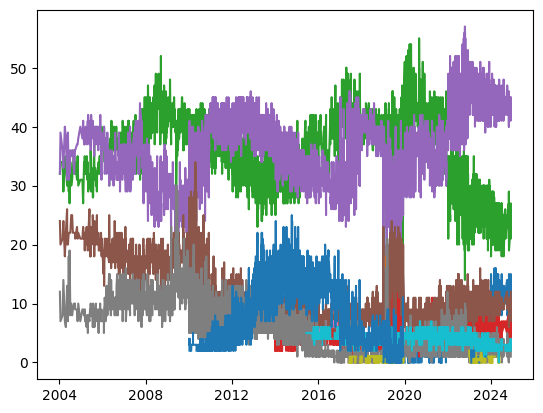

In [ ]:
# Plots GB
plt.plot(gb_df['enddate'], gb_df[gb_parties])

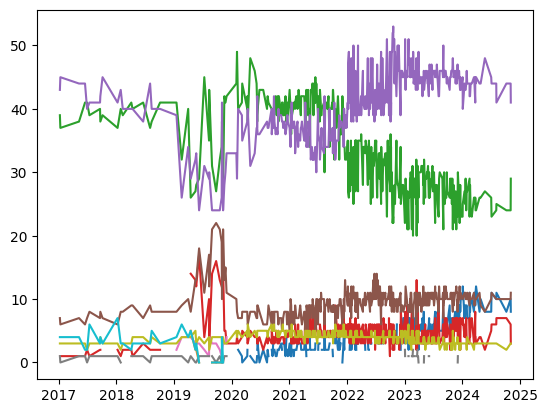

In [ ]:
# Plots UKM
plt.plot(ukm_df['enddate'], ukm_df[ukm_parties])

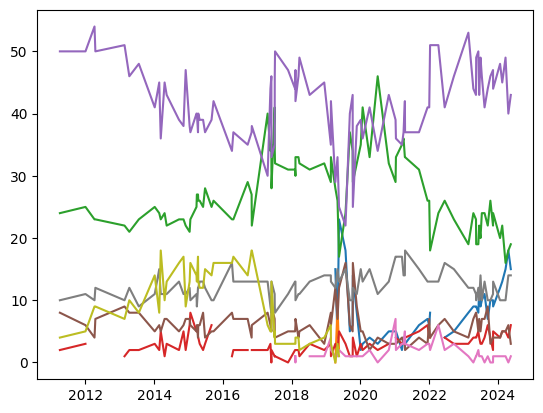

In [ ]:
# Plots Wales
plt.plot(wal_df['enddate'], wal_df[wal_parties])

In [ ]:
# Last ninety days for GB
last_90_days_df_gb = gb_df[gb_df['enddate'] >= gb_df['enddate'].max() - pd.Timedelta(days=90)]
# Last thirty days for GB
last_30_days_df_gb = gb_df[gb_df['enddate'] >= gb_df['enddate'].max() - pd.Timedelta(days=30)]

average_polling_last_90_days_gb = last_90_days_df_gb.mean(numeric_only=True)
average_polling_last_30_days_gb = last_30_days_df_gb.mean(numeric_only=True)

print(average_polling_last_90_days_gb)
print(average_polling_last_30_days_gb)

partycode
samplesize    2899.083333
BRX             10.750000
CHN                   NaN
CON             24.416667
GRE              5.875000
LAB             43.500000
LIB              9.916667
NAT                   NaN
OTH              2.476190
PLC              1.000000
SNP              2.857143
UKI                   NaN
dtype: float64
partycode
samplesize    4309.666667
BRX             11.000000
CHN                   NaN
CON             24.222222
GRE              5.888889
LAB             43.333333
LIB             10.000000
NAT                   NaN
OTH              2.500000
PLC                   NaN
SNP              3.125000
UKI                   NaN
dtype: float64


In [ ]:
# Last ninety days for Scotland
last_90_days_df_scotland = scotland_df[scotland_df['enddate'] >=scotland_df['enddate'].max() - pd.Timedelta(days=90)]
# Last thirty days
last_30_days_df_scotland = scotland_df[scotland_df['enddate'] >= scotland_df['enddate'].max() - pd.Timedelta(days=30)]

average_polling_last_90_days_scotland = last_90_days_df_scotland.mean(numeric_only=True)
average_polling_last_30_days_scotland = last_30_days_df_scotland.mean(numeric_only=True)

print(average_polling_last_90_days_scotland)
print(average_polling_last_30_days_scotland)

partycode
samplesize    1051.00
BRX              3.75
CHN               NaN
CON             15.75
GRE              3.50
LAB             34.75
LIB              8.00
OTH              1.50
SNP             33.00
OTH              1.50
UKI               NaN
dtype: float64
partycode
samplesize    1086.0
BRX              5.0
CHN              NaN
CON             16.0
GRE              4.0
LAB             32.0
LIB              9.0
OTH              3.0
SNP             32.0
OTH              3.0
UKI              NaN
dtype: float64
